<a href="https://colab.research.google.com/github/Kunalwagh107/n-python-numpy-pandas/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *pandas*

In [ ]:
import pandas as pd
import numpy as np

# *#pandas series*

In [ ]:
# 1D array can hold any data type -> like a column in table
# -->  it has value and index --> 2 things and name
# dtype -> strings -> usually named as Object

## *creating pd.Series()*




In [ ]:
# string --> default pick as dtype : object
country = ['India','China','USA'] # <-- any iterable source
pd.Series(country)

In [ ]:
# integer --> default pick as dtype : int64
runs = [12,23,45,34,np.nan]
runs = pd.Series(runs)
runs

In [ ]:
# custom indexing with name setting --> both should be same count
subject = ['Stat','AI','ML']
marks = [100,101,102]
marks = pd.Series(marks,index=subject,name='Kunal Marks')

### *-series from dict*

In [ ]:
d = {
    'Math':101,
    'Stat':100,
    'AI': 100,
    'ML':np.nan
}

marks = pd.Series(d,name='Kunal') # <-- default take keys as index
marks

### *-read_csv*

#### *--single column - pd.Series*

In [ ]:
path_subs = '/content/drive/MyDrive/4. Data Files/Pandas/Series/series.csv'
#-------------------------------------------------------------------------------
subs = pd.read_csv(path_subs)
print(subs) # <- default = DataFrame ->gives indexing -> First element as name
print(type(subs))

# to convert it into series ---> .squeeze()
subs = pd.read_csv(path_subs).squeeze()
print(type(subs))
print(subs)

#### *--2 columns - one as index and other as value*

In [ ]:
# --> data with 2 columns(match_num, runs) --> need match_num as index
rohit_runs = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Series/runs.csv',index_col= 'match_num').squeeze()
print(rohit_runs)
# runs will be name of the pd.Series() #--> index should be unique but it will not throw an erorr if it is same

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Series/movies.csv',index_col='movie_name').squeeze()
movies

## *series attributes*


1.   **.size**  *#---> includes missing*
2.   **.dtype**
3.   **.name**
4.   **.is_unique** *#--->checks if all items are unique*
5.   **.index**
6.   **.values**



In [ ]:
# size --> how many items --> counts missing as well
print(marks)
marks.size # --> 4 items

In [ ]:
marks.dtype # ---> data type #<--due to NaN is float --> uppercast

In [ ]:
marks.name

In [ ]:
k = pd.Series([1,2,3])
print(k.name)

In [ ]:
marks.is_unique #-> checks if all items are unique or not -> check how to use it on np arrays

In [ ]:
marks.index #--> gives index object --> immutable

In [ ]:
runs.index # --> gives range index --> special object --> generates special objects

In [ ]:
marks.values # ---> gets numpy array

## series methods


### *-general Series methods*

1.   **.head(n)**/ **.tail(n)**/ **.sample(n)**
2.   **.value_counts**()
3.   **.sort_value**(ascending = False) <-- default True
4.   **.sort_index**(ascending = False) <-- default True


In [ ]:
# .head() and .tail() --> default shows top/bottom 5 rows

subs.head() # <-- we can provide values in brackets if want to go beyound 5
subs.head(10)

In [ ]:
# .sample() --> shows one random row from sample

movies.sample() # <-- can specify numbers ()<-- here as well
# --> to remove the bias of data

In [ ]:
# .value_counts --> frquency count of values as a new series with value as index and frequencies as values

movies.value_counts() # <--- values in descending order -> this is new series



In [ ]:
# .sort_values --> sort values -> not permenant change

rohit_runs.sort_values() # default ascending
rohit_runs.sort_values(ascending=False) #---> this will give descending

# utility --> method chaining
rohit_runs.sort_values(ascending=False).head(5) # <--- gives top 5
rohit_runs.sort_values(ascending=False).head(5).values # <-- only values
rohit_runs.sort_values(ascending=False).head(5).values[0] #<--first value

In [ ]:
# .sort_values(inplace=True) --> to change it in permanant change
rohit_runs = rohit_runs.copy()
rohit_runs.sort_values(inplace=True) # discouraged -> use re-assignment
rohit_runs

In [ ]:
# .sort_index() -> # default - ascending

print(movies)
movies.sort_index() # --> sorted based on index

### *-important series methods*


1.   **.astype**('data_type')
2.   **.between**(upper_range,lower_range)
3.   **.clip**(upper_range, lower_range)
4.   **.drop_duplicates**(keep='first or last')
5.   **.isnull**()**.sum**() --> missing values
6.   **.dropna**()/**.fillna**(condition/value)
7.   **.apply**(lambda x : custom logic x)
8.   **.copy**()

In [ ]:
# .astype('datatype') --> chage the size of Series

import sys

sys.getsizeof(rohit_runs)

In [ ]:
sys.getsizeof(rohit_runs.astype('object'))

In [ ]:
sys.getsizeof(rohit_runs)

In [ ]:
# between --> checks if value exists in range --> returns bool

rohit_runs[rohit_runs.between(51,99)] # --> both are included

In [ ]:
# clip

subs.clip(100,200) # --> extreme values are clipped and between values are same

In [ ]:
# drop_duplicates
temp = pd.Series([1,2,2,3,3,1,1,2,2,3,4,4])
temp.drop_duplicates() # --> first occurence stays, others delete

In [ ]:
temp.drop_duplicates(keep='last') # <-- this keeps the last occurence

In [ ]:
k = movies.duplicated() # -> returns a new series with values as index and boolen as values
# we sum it to get the total duplicate values
k.sum() #

 # <-- count of duplicate values

In [ ]:
# dealing with missing values
data = pd.Series([1, np.nan, 3, 4, np.nan, 6, 7, 8, np.nan, 10, 11, np.nan, 13, 14, 15])
data

In [ ]:
data.size

In [ ]:
data.count()

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum() #--> total number of missing values

In [ ]:
# handle --
# 1. remove

data.dropna() #--> gets new Series

In [ ]:
# 2. replace

fill_zero = data.fillna(0)
fill_mean = data.fillna(data.mean()) # <-- we can apply custom logic
print(fill_zero)
print(fill_mean)

In [ ]:
# isin --> checks multiple conditions in series

k = rohit_runs.isin([49,99,199,159])
rohit_runs[k]

In [ ]:
# apply --> write custom logic

# need first name of actor and full capital
movies.apply(lambda x:x.split()[0].upper())


In [ ]:
# more than average good day , less -> bad day

subs.apply(lambda x : 'good day' if x > subs.mean() else 'bad day')

In [ ]:
# copy -->

five_match = rohit_runs.head()

five_match #<-- we are not getting copy -> it's view
# so any changes in this will change the original data

# correct approch
five_match = rohit_runs.head().copy() # -> creates copy

### *-series mathematical methods*

1.   .**count**()
2.   .**sum**()/.**product**()
3.   .**mean**()/.**median**()/.**mode**()/.**std**()/.**var**()
4.   .**min**()/.**max**()
5.   .**describe**()



In [ ]:
# count --> counts total number of items-> exludes missing
rohit_runs.count()

In [ ]:
# .sum & .product() --> sum of values
subs.sum()
subs.product() # <-- for bigger value returns 0

In [ ]:
# mean/median/mode/std/var --> all for values
subs.mean()
subs.median()
subs.mode()
subs.var() # <-- how spread out numbers are (squared measure)
subs.std() # <--- change wrt mean


In [ ]:
# .min() & .max()
subs.min()
subs.max()

In [ ]:
subs.describe()

In [ ]:
rohit_runs.describe( )

## *indexing[n] and slicing[:,[],<]*

In [ ]:
# on default index ---->
x = pd.Series([1123,34,34,54,5,65,667,6,344,34])
x[1]
#x[-1] # --> works only on positive indexing
x.iloc[-1] # this will work

In [ ]:
# on custom index
movies
print(movies['Golden Boys'])
print(movies[1]) # both will work but -> instead this use .iloc[1]
print(movies.iloc[-1]) # if custom indexing is string the negative indexing will work

In [ ]:
# integer indexing
x = pd.Series([1,12,34,45,23,12,34,454,2])
print(x[1:3])
print(x[-5:]) # <- here it works unlike indexing
print(x[[1,4,5]]) # --> fancy indexing
print(x[x<10]) # --> boolean indexing

## *editing series*


In [ ]:
# genrally we use read in pandas but it gives us writing functionality as well
marks = marks.copy()
marks

In [ ]:
# using indexing
marks['ML'] = 101
marks

In [ ]:
marks['Algo'] = 100 # if not exist -> creates new item in the series
marks # --> for reading throw error but for writing -> adds it

In [ ]:
marks[:2] = 101 # slicing
marks

In [ ]:
# with fancy indexing
marks[['Algo','ML']] = 101
marks

In [ ]:
# using index label
movies['Golden Boys'] = 'Kunal Wagh'
movies

## *Series with core python application*

In [ ]:
# len/type/dir/sorted/max/min
s = pd.Series([1,2,3,4,5])
print(len(s))
print(type(s))
print(dir(s))
print(sorted(s)) # --> return is in list
print(max(s))
print(min(s))
print(sum(s))

In [ ]:
# type conversion

l = list(s)
d = dict(s)
print(l)
print(d)
print(dict(marks))

In [ ]:
# membership operator

'ML' in marks # in --> by default works on the index
101 in marks.values # <-- this searches in values

In [ ]:
# loops

for i in marks: # <-- default works on values
  print(i)

for i in marks.index: # <--- this searches in index
  print(i)

In [ ]:
# arithematic operators (broadcasting)
100 - marks # <-- substract from values
# similarly works for other application as well

## plotting graphs on Series

In [ ]:
movies.value_counts().head(10).plot(kind = 'bar')

In [ ]:
movies.value_counts().head(10).plot(kind = 'pie')

In [ ]:
marks.unique()

# *#pandas dataframe*

In [ ]:
# --> tabular data -> single row or column will also called as Series

## creating df

### *-from list*

In [ ]:

# --> using list
student_list = [   # <--we need 2d list
    [100,101,18], #<-- every element is the row
    [110,102,20],
    [120,102,22],
    [120,102,22]
]
column_head = ['iq','marks','package']
index_head = ['A','B','C','D']
student_data1 = pd.DataFrame(student_list,columns=column_head,index=index_head,dtype='float64')
student_data1

### *-from dict*

In [ ]:
# using dict
student_dict = {
    'iq' : [100,110,120],  # <--- all array should be of same length
    'marks' : [100,101,102],
    'package': [16,18,20]
}
student_data = pd.DataFrame(student_dict)
student_data # <-- automatically takes keys as columns

### *-using read.csv*

In [ ]:
# using read_csv

movies = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/movies.csv')
ipl = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/ipl-matches.csv')
batsman = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/batsman_runs_ipl.csv')

## *DatFrame attributes*



1.   **.shape** #--> returns (rows,columns)
2.   **.dtypes** #--> gets series with i - col & v - type
3.   **.index**/**.column**
4.   **.values** #--> return in 2D numpy array

In [ ]:
movies.shape # (rows,columns)

In [ ]:
movies.dtypes # <-- gets the series
ipl.dtypes

In [ ]:
movies.index

In [ ]:
movies.columns # <--- all the columns that are present
ipl.columns

In [ ]:
student_data.values
ipl.values # <-- multiple values --> therefore getting result in 2D numpy array

## *DataFrame methods*





### *-general and utility methods*

1.   .**head**()/.**tail**()/**sample**()
2.   .**info**() #--> high level information about df
3.   .**describe**() #-->automatically on numerical columns
4.   .**isnull**()
5.   .**duplicated**() #--> duplicate row -> True
6.   .**rename**({old_name:new_name})


In [ ]:
movies.head()

In [ ]:
movies.tail(3)

In [ ]:
movies.sample()

In [ ]:
movies.info() # <-- high level info. about df
ipl.info()

In [ ]:
movies.describe() # <-- numerical columns automatically

In [ ]:
movies.isnull() # <--- bool dataframe
k = movies.isnull().sum() # --> gives sum


In [ ]:
movies.duplicated() # perticular row --> if duplicated -> true


In [ ]:
student_data1.duplicated() # this will give True for last row


In [ ]:
# rename --> column name rename
print(student_data1)

student_data1.rename(columns={'package':'LPA'}) # inplace = True for permenant change

### *-math methods*

In [ ]:
movies.product(numeric_only=True)

In [ ]:
student_data

In [ ]:
student_data.sum() #<--- sums all the colums

In [ ]:
student_data.sum(axis=1) # <-- sum by row

In [ ]:
student_data.mean()

In [ ]:
# all the mathematical functions applied over here as series

## *indexing and slicing* -> *select and filter*

### *-indexing columns*

In [ ]:
#--> if we select single column --> series
movies['title_x'] # <- this is how we select the columns
print(type(movies['title_x'])) # <-- this will be series

In [ ]:
# multiple columns fetch
movies[['title_x','year_of_release','actors']] # <-- this is DataFrame
# --> order is preserved

### *-how to fetch rows*

In [ ]:
student_dict = {
    'name': ['Kunal','Bharat','wagh'],
    'iq' : [100,110,120],  # <--- all array should be of same length
    'marks' : [100,101,102],
    'package': [16,18,20]
}
student_data = pd.DataFrame(student_dict)
student_data.set_index('name',inplace=True) # <-- this will set index as name
student_data

#### *-- .iloc[rows,colum]*

In [ ]:
# iloc -> searches using index position
movies.iloc[0] # <-- index position
# evey single row or column is series --> here row
# 0th row and col become index and row become value

In [ ]:
# multiple fetching using iloc
movies[0:5:3] # start:end:jump

In [ ]:
movies.iloc[[0,4,5]] # <-- fancy indexing

#### *-- .loc[row_name,column_name]*

In [ ]:
# loc --> search by index_name -> both ends included

student_data.loc['Kunal':'wagh':2] # both ends included
# in iloc last is not included

In [ ]:
# even though we named it mannually it can also take iloc
student_data.iloc[0]

### *-indexing both rows and columns*

In [ ]:
# selecting both rows and columns

movies.iloc[0:3,0:3] # <--- index position
movies.loc[0:2,'title_x':'poster_path'] # <--actual names

# there are 2 indexing -> pandas own -> .iloc and defined .loc

### *-filtering DataFrame*

In [ ]:
ipl.info()

In [ ]:
# all final winner

ipl[ipl['MatchNumber'] == 'Final'].loc[:,['Season','WinningTeam']]
ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

In [ ]:
# how many superover finished has occured
super_over_y = ipl['SuperOver'] == 'Y'
ipl[super_over_y].shape[0]

In [ ]:
# how many matches MI won in Kolkata
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] =='Mumbai Indians')].shape[0]

In [ ]:
# toss winner is match winner in percentage
total = ipl.shape[0]
toss_match_winner = ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]

percentage = (toss_match_winner/total)*100
print(round(percentage,2))

In [ ]:
movies.info()

In [ ]:
# movies with rating higher than 8 and votes > 10000
movies[(movies['imdb_votes']>1000) & (movies['imdb_rating']>8)].shape[0]

In [ ]:
# action movies with rating more than 8
movies[(movies['genres'].str.contains('Action')) & (movies['imdb_rating'] >7.5)].shape[0]

## *add columns*

### *-from scratch*

In [ ]:
movies['Country'] = 'India'
movies

### *-from existing column*

In [ ]:
movies = movies.dropna(subset=['actors'])
# Extract first actor
movies['first_actor'] = movies['actors'].str.split('|').str[0]
movies['first_actor'
]

## *important DataFrame methods*


In [ ]:
#-------------------------------------------------------------------------------
# .astype(data_type)
#-------------------------------------------------------------------------------

In [ ]:
# .astype() - use to optimize data -> reduce memory footprint
ipl.info()

In [ ]:
ipl['ID'] = ipl['ID'].astype('int32')
ipl['Margin'] = ipl['Margin'].astype('float32')
ipl['Team1'] = ipl['Team1'].astype('category') # <-- pandas dtype
ipl['Team2'] = ipl['Team2'].astype('category')
ipl['TossWinner'] = ipl['TossWinner'].astype('category')

In [ ]:
k = pd.Series([1,3,4,5])
k.info()

In [ ]:
ipl.info()

In [ ]:
#-------------------------------------------------------------------------------
# value_counts()  #---> works on both Series and DataFrame
#-------------------------------------------------------------------------------
# use_cases =

In [ ]:
# value_counts()  #---> both
student_list = [
    [100,101,18],
    [110,102,20],
    [120,102,22],
    [120,102,22],
    [120,102,22]
]
column_head = ['iq','marks','package']
index_head = ['A','B','C','D','E']
student_data1 = pd.DataFrame(student_list,columns=column_head,index=index_head,dtype='float64')
student_data1

In [ ]:
student_data1.value_counts() # checks frequency count of row
# --> mostly used in series

In [ ]:
# players which has most man of the match in final and qualifier
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

In [ ]:
# toss win -> pie of bat or bowl
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
# how many matches each team has played #--> index should match
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

In [ ]:
#-------------------------------------------------------------------------------
# .sort_values(ascending = True/False)  --> works on both Series and DataFrame
#-------------------------------------------------------------------------------


In [ ]:
# based on single column -->
movies.sort_values(['title_x'],ascending=False)

In [ ]:
students = pd.DataFrame({
    'name': ['nitish', 'ankit', 'rupesh', np.nan, 'mrityunjay', np.nan, 'rishabh', np.nan, 'aditya', np.nan],
    'college': ['bit', 'iit', 'vit', np.nan, 'vlsi', 'ssit', np.nan, np.nan, 'git', np.nan],
    'branch': ['eee', 'it', 'cse', np.nan, 'me', 'ce', 'civ', 'cse', 'bio', np.nan],
    'cgpa': [6.66, 8.25, 6.41, np.nan, 5.6, 9.0, 7.4, 10, 7.4, np.nan],
    'package': [4, 5, 6, np.nan, 6, 7, 8, 9, np.nan, np.nan]
})
students

In [ ]:
# sorting when NaN is there -->
students.sort_values('name') #-> missing values goes down
students.sort_values('name',na_position= 'first') # default - last
# permenant changes -> inplace = True

In [ ]:
# sorting based on multiple columns
# --> year of release and then sorting by title
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

In [ ]:
#-------------------------------------------------------------------------------
# rank()  ---> works on only series
#-------------------------------------------------------------------------------
# can use sort_values as well !

In [ ]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)# by default ascending -> low is more
batsman.sort_values('batting_rank') # equal rank for same runs

In [ ]:
#-------------------------------------------------------------------------------
# sort_index()   #---> works on both
#-------------------------------------------------------------------------------

In [ ]:
movies.sort_index(ascending=False)

In [ ]:
#-------------------------------------------------------------------------------
# set_index  # ---> works only on DataFrame
#-------------------------------------------------------------------------------
# sometimes want to make some column as index

In [ ]:
batsman.set_index('batter',inplace=True)
batsman

In [ ]:
#-------------------------------------------------------------------------------
# reset_index  # --> works both on series and DataFrame
#-------------------------------------------------------------------------------

In [ ]:
batsman.reset_index('batter',inplace=True)
batsman # <-- if we set it again with other column the old index gets deleted

In [ ]:
# replace index without losing the column
batsman.reset_index().set_index('batsman_run')
# we first reset and then set

In [ ]:
# we can apply it on series as well
marks.reset_index() # ---> it becomes DataFrame

In [ ]:
#-------------------------------------------------------------------------------
# .rename()   #---> only DataFrame
#-------------------------------------------------------------------------------


In [ ]:
movies.set_index('title_x',inplace = True)

In [ ]:
movies.rename(columns={'imdb_id':'imdb'}) # can rename columns

In [ ]:
movies.rename(index ={'Uri: The Surgical Strike' : 'URI'},inplace=True)

In [ ]:
movies

In [ ]:
#-------------------------------------------------------------------------------
# .unique() #-->works only on series
#-------------------------------------------------------------------------------


In [ ]:
ipl['Season'].unique()

In [ ]:
# number of unique values
students['name'].unique() # will calculate Nan
students['name'].nunique() # gives number of unique -> but dosen;t count Nan

In [ ]:
#-------------------------------------------------------------------------------
# .isnull()/.notnull() --> reverse # works on both  / .hasnans -> not on df
#-------------------------------------------------------------------------------

In [ ]:
#series
print(students['name'].isnull())
print(students['name'].notnull()) # ---> opposite of isnull()
print(students['name'].hasnans) # -> tells if column has missing value or not

In [ ]:
students.isnull() # <--- applies on each value in dataframe

In [ ]:
#-------------------------------------------------------------------------------
# .dropna() # <-- works on both
#-------------------------------------------------------------------------------

In [ ]:
students.dropna() # if in any row there is one missing then all removed

In [ ]:
# remove if only all values are null
students.dropna(how='all') # default  how = 'any'

In [ ]:
# remove rows if null in specific column
students.dropna(subset='name')

In [ ]:
# name or college missing
students.dropna(subset=['name','college'])

In [ ]:
#-------------------------------------------------------------------------------
# .fillna() # <-- works on both
#-------------------------------------------------------------------------------

In [ ]:
students['name'].fillna('unknown')

In [ ]:
students.fillna(0) # can fill all tha missing value with 0
# --> it is advised to take it on column by column basis
# --> single value will not make sense on all the elements

In [ ]:
students['package'].fillna(students['package'].mean())

In [ ]:
# we can use forward fill or backword fill

#students['name'].fillna(method='ffill')
students['name'].ffill()

In [ ]:
#-------------------------------------------------------------------------------
# drop_duplicates --> works on both
#-------------------------------------------------------------------------------

In [ ]:
student_data1['iq'].drop_duplicates() # takes 1st occurrance

In [ ]:
student_data1.drop_duplicates(keep='last') # keeps last element

In [ ]:
# find the last ipl match played by virat in delhi

In [ ]:
ipl.sort_index(inplace=True,ascending=False)
m1 = ipl['Team1Players'].str.contains('V Kohli')
m2 = ipl['Team2Players'].str.contains('V Kohli')

ipl[m1|m2].drop_duplicates(subset = 'City',keep='last')[ipl['City'] =='Delhi']

In [ ]:
#-------------------------------------------------------------------------------
# .drop() --> works on both --> drops row
#-------------------------------------------------------------------------------

In [ ]:
students

In [ ]:
students.drop(columns=['branch','cgpa']) # -> dropping columns

In [ ]:
students.drop(index=[0,2]) # works with labelled index -> need to put values

In [ ]:
#-------------------------------------------------------------------------------
# .apply() # <--- works with both
#-------------------------------------------------------------------------------

In [ ]:
# Series -> row by row operation

temp = pd.Series([1,2,3,3])
def sigmoid(num):
  return 1/1+np.exp(-num)

temp.apply(sigmoid)

In [ ]:
import pandas as pd

points_df = pd.DataFrame(
    {
        '1st point': [(3, 4), (-6, 5), (0, 0), (-10, 1), (4, 5)],
        '2nd point': [(-3, 4), (0, 0), (2, 2), (10, 10), (1, 1)]
    }
)

points_df

In [ ]:
# series --> column traverse

# we can apply row wise transverse

def euclidean(row):
    pt_A = row['1st point'] # <--- data enters like a series for axis 1
    pt_B = row['2nd point'] #
    return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

# point1    (0, 0) # this is how data enters in function
# point2    (3, 4)
points_df['distance'] = points_df.apply(euclidean, axis=1)
points_df


In [ ]:
# -->check what is pd.NA # .get()

In [ ]:
#-------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------

# *#groupby in pandas*

### *database connection*

In [1]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/imdb-top-1000.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Director       1000 non-null   object 
 6   Star1          1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   float64
 9   Metascore      843 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


## *creating df.groupby('')*

In [ ]:
# --> you form groups based on perticular column
# --> always on categorical column

genres = movies.groupby('Genre') # <-- groupby object

genres # -> this will be grouped based on specified column

# it basically creates a dataframe per column value
# (colume_value) + (dataframe with column value)
for column_value, dataframe in genres:
  print(column_value)
  print(dataframe)

Action
                                          Series_Title Released_Year  Runtime  \
2                                      The Dark Knight          2008      152   
5        The Lord of the Rings: The Return of the King          2003      201   
8                                            Inception          2010      148   
10   The Lord of the Rings: The Fellowship of the Ring          2001      178   
13               The Lord of the Rings: The Two Towers          2002      179   
..                                                 ...           ...      ...   
968                                       Falling Down          1993      113   
979                                      Lethal Weapon          1987      109   
982                                          Mad Max 2          1981       96   
983                                       The Warriors          1979       92   
985                               Escape from Alcatraz          1979      112   

      Genre  IMDB_Ra

## *use case of groupby object*

In [ ]:
# apply aggregation functions on groupby object
# any mathematical functions -->
print(genres.mean(numeric_only=True)) # numeric only is part of mean function

              Runtime  IMDB_Rating    No_of_Votes         Gross  Metascore
Genre                                                                     
Action     129.046512     7.949419  420246.581395  1.897224e+08  73.419580
Adventure  134.111111     7.937500  313557.819444  1.319017e+08  78.437500
Animation   99.585366     7.930488  268032.073171  1.784326e+08  81.093333
Biography  136.022727     7.938636  272805.045455  9.404952e+07  76.240506
Comedy     112.129032     7.901290  178195.658065  1.010572e+08  78.720000
Crime      126.392523     8.016822  313398.271028  7.899656e+07  77.080460
Drama      124.737024     7.957439  212343.612457  1.225259e+08  79.701245
Family     107.500000     7.800000  275610.500000  2.195553e+08  79.000000
Fantasy     85.000000     8.000000   73111.000000  3.913633e+08        NaN
Film-Noir  104.000000     7.966667  122405.000000  4.197018e+07  95.666667
Horror     102.090909     7.909091  340232.363636  9.405902e+07  80.000000
Mystery    119.083333    

### *- examples*

In [ ]:
# find top 3 genres
movies.groupby('Genre').sum(numeric_only=True)['Gross'].sort_values(ascending=False).head(3)

,Gross
Genre,
Drama,3.540997e+10
Action,3.263226e+10
Comedy,1.566387e+10


In [ ]:
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3) # <-- fast way
# above summing first

,Gross
Genre,
Drama,3.540997e+10
Action,3.263226e+10
Comedy,1.566387e+10


In [ ]:
# Hightest avg imdb rating
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

In [ ]:
# director with most popularity
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False)

In [ ]:
# highest rated movie from each genere
movies.groupby('Genre')['IMDB_Rating'].max()

In [ ]:
# find number of movies done by each actor

movies['Star1'].value_counts()
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending=False)

#work in 3 steps -
# -> groupby(perticular_column)[desired_column].aggeregate_operation()

,Series_Title
Star1,
Tom Hanks,12
Robert De Niro,11
Clint Eastwood,10
Al Pacino,10
Leonardo DiCaprio,9
...,...
Gérard Jugnot,1
Günes Sensoy,1
Haluk Bilginer,1


## *groupby attributes and methods*

- ***len(groupby_obj)***
- ***.groups*** -> dict {group_element : list_of_index}
- ***.size()***
- ***.nunique()***
#-----------------
- ***.first()/.last()/.nth(n)/sample(n,replace=True)*** -> view elements

#-----------------
- ***.get_groups('group_element_name')*** -> returns df
#-----------------
- ***.describe()***
- ***.agg({agg_col : [ops1,ops2]})***
- ***.apply(custom_function)***
- ***for name, df in groupby_obj:***

### *- information about groups*

In [ ]:
genres = movies.groupby('Genre')

In [ ]:
# len(groupby_obj)

# calculate number of groups
len(movies.groupby('Genre'))
# alternative approch
movies['Genre'].nunique()

14

In [ ]:
# .groups

genres.groups # --> dict Groups : [list_of_index of all releted ]

{'Action': [2, 5, 8, 10, 13, 14, 16, 29, 30, 31, 39, 42, 44, 55, 57, 59, 60, 63, 68, 72, 106, 109, 129, 130, 134, 140, 142, 144, 152, 155, 160, 161, 166, 168, 171, 172, 177, 181, 194, 201, 202, 216, 217, 223, 224, 236, 241, 262, 275, 294, 308, 320, 325, 326, 331, 337, 339, 340, 343, 345, 348, 351, 353, 356, 357, 362, 368, 369, 375, 376, 390, 410, 431, 436, 473, 477, 479, 482, 488, 493, 496, 502, 507, 511, 532, 535, 540, 543, 564, 569, 570, 573, 577, 582, 583, 602, 605, 608, 615, 623, ...], 'Adventure': [21, 47, 93, 110, 114, 116, 118, 137, 178, 179, 191, 193, 209, 226, 231, 247, 267, 273, 281, 300, 301, 304, 306, 323, 329, 361, 366, 377, 402, 406, 415, 426, 458, 470, 497, 498, 506, 513, 514, 537, 549, 552, 553, 566, 576, 604, 609, 618, 638, 647, 675, 681, 686, 692, 711, 713, 739, 755, 781, 797, 798, 851, 873, 884, 912, 919, 947, 957, 964, 966, 984, 991], 'Animation': [23, 43, 46, 56, 58, 61, 66, 70, 101, 135, 146, 151, 158, 170, 197, 205, 211, 213, 219, 229, 230, 242, 245, 246, 270, 33

In [ ]:
# .size() -> returns series based on sorted index

# every group has how many rows
movies.groupby('Genre').size() #.sort_values(ascending=False) # <-- sorts by index

# #alternative approch
# movies['Genre'].value_counts() # <-- sorted based on value

In [ ]:
# .nunique -> returns dataframe of all unique values per column per group
genres.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


### *- fetching elements*

In [ ]:
# fetching elements -> first/last/nth/sample
genres.first()
genres.last()
genres.nth(6) # 6th movie of each group -> if not exist then it will not show
genres.sample(2,replace=True) #--> random movies from each genre
# --> replace, if not exist 2 movies then return one 2 times

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
702,Bonnie and Clyde,1967,111,Action,7.8,Arthur Penn,Warren Beatty,102415,909838190.0,86.0
641,Gongdong gyeongbi guyeok JSA,2000,110,Action,7.8,Chan-wook Park,Lee Yeong-ae,26518,147161249.0,58.0
692,The Man Who Would Be King,1975,129,Adventure,7.8,John Huston,Sean Connery,44917,335861628.0,91.0
114,2001: A Space Odyssey,1968,149,Adventure,8.3,Stanley Kubrick,Keir Dullea,603517,56954992.0,84.0
665,Batman: Mask of the Phantasm,1993,76,Animation,7.8,Kevin Altieri,Boyd Kirkland,43690,5617391.0,NaN
728,Omoide no Mânî,2014,103,Animation,7.7,James Simone,Hiromasa Yonebayashi,32798,765127.0,72.0
157,Der Untergang,2004,156,Biography,8.2,Oliver Hirschbiegel,Bruno Ganz,331308,5509040.0,82.0
418,Papillon,1973,151,Biography,8.0,Franklin J. Schaffner,Steve McQueen,121627,53267000.0,58.0
251,"Crna macka, beli macor",1998,127,Comedy,8.1,Emir Kusturica,Bajram Severdzan,50862,348660.0,73.0
500,C.R.A.Z.Y.,2005,129,Comedy,7.9,Jean-Marc Vallée,Michel Côté,31476,527282774.0,81.0


### *- fetching groups*

In [ ]:
# get the perticular group and see all entries
genres.get_group('Horror') # <--- gets data frame

# # we can do it via bool indexing
# movies[movies['Genre'] == 'Horror'] # -> but above is fast since it alrady forms group


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
75,Alien,1979,117,Horror,8.4,Ridley Scott,Sigourney Weaver,787806,78900000.0,89.0
271,The Thing,1982,109,Horror,8.1,John Carpenter,Kurt Russell,371271,13782838.0,57.0
419,The Exorcist,1973,122,Horror,8.0,William Friedkin,Ellen Burstyn,362393,232906145.0,81.0
544,Night of the Living Dead,1968,96,Horror,7.9,George A. Romero,Duane Jones,116557,89029.0,89.0
707,The Innocents,1961,100,Horror,7.8,Jack Clayton,Deborah Kerr,27007,2616000.0,88.0
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0
844,Halloween,1978,91,Horror,7.7,John Carpenter,Donald Pleasence,233106,47000000.0,87.0
876,The Invisible Man,1933,71,Horror,7.7,James Whale,Claude Rains,30683,298791505.0,87.0
932,Saw,2004,103,Horror,7.6,James Wan,Cary Elwes,379020,56000369.0,46.0


### *- applying aggregation and custom func*

In [ ]:
# .describe()

genres.describe() # study based on all numeric

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [ ]:
# .agg('arith_func)
genres['Runtime'].agg(['sum','max','min']) # _--> provides list

,sum,max,min
Genre,,,
Action,22196,321,45
Adventure,9656,228,88
Animation,8166,137,71
Biography,11970,209,93
Comedy,17380,188,68
Crime,13524,229,80
Drama,36049,242,64
Family,215,115,100
Fantasy,170,94,76


In [ ]:
# multiple operations on groupby -- by providing dict ->agg
genres.agg({
    'Runtime':['mean','max'],
    'IMDB_Rating' : 'mean',
    'No_of_Votes' : 'sum',
    'Gross' : 'sum',
    'Metascore' : 'min'
})

In [ ]:
# apply(custom_logic)

# split + apply + combine --> strategy
genres.apply('max') # we can send the custom logic in the apply

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,Yôjinbô,2019,321,9.0,Zack Snyder,Yun-Fat Chow,2303232,936662225.0,98.0
Adventure,Zombieland,PG,228,8.6,Ömer Faruk Sorak,Yves Montand,1512360,874211619.0,100.0
Animation,Ôkami kodomo no Ame to Yuki,2020,137,8.6,Yoshifumi Kondô,Yôji Matsuda,999790,873839108.0,96.0
Biography,Zerkalo,2020,209,8.9,Tom McCarthy,Éric Toledano,1213505,753585104.0,97.0
Comedy,Zindagi Na Milegi Dobara,2020,188,8.6,Zoya Akhtar,Ömer Faruk Sorak,939631,886752933.0,99.0
Crime,À bout de souffle,2019,229,9.2,Yavuz Turgul,Vincent Cassel,1826188,790482117.0,100.0
Drama,Zwartboek,2020,242,9.3,Çagan Irmak,Çetin Tekindor,2343110,924558264.0,100.0
Family,Willy Wonka & the Chocolate Factory,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
Fantasy,Nosferatu,1922,94,8.1,Robert Wiene,Werner Krauss,88794,445151978.0,NaN


In [ ]:

# Example 1 -> movies starting with A within each group


In [ ]:
# Find number of movies starting with A
def starts_with_A(group):
  return group['Series_Title'].str.startswith('A').sum() # <-combine
# apply will take each group's df and then apply the function line by line and return


# any function we are applying consist the df of that perticular group only
# -> it's like passing whole df and doing operation on that in one go

In [ ]:
genres.apply(starts_with_A,include_groups=False) # apply is sending DataFrames -

,0
Genre,
Action,10
Adventure,2
Animation,2
Biography,9
Comedy,14
Crime,4
Drama,21
Family,0
Fantasy,0


In [ ]:

# Example 2 -> ranking within group based on IMDB


In [ ]:
# find ranking of each movie in the group according to imdb
def ranking_fun(data): # <--- it will rank within group
  data['Movie_rank_g'] = data['IMDB_Rating'].rank(ascending=False) # <-- will take each group and add rank
  return data


In [ ]:
genres.apply(ranking_fun)

In [ ]:

# Example 3 -> normalized ratings within every group


In [ ]:
# normalized rating -->
# x' = x - xmin / xmax - xmin -> based on group

def norm(data): # <-- perform operation on dataframe and return dataframe
  Nr = data['IMDB_Rating'] - data['IMDB_Rating'].min()
  Dr = data['IMDB_Rating'].max() - data['IMDB_Rating'].min()
  data['Normalized_rating'] = Nr/Dr
  return data

In [ ]:
genres.apply(norm)

In [ ]:
# looping  --> gets group_name and DataFrame

df = pd.DataFrame(columns=movies.columns) # <-- empty dataframe
for group, data in genres:  # genres is a groupby object: (group, DataFrame)
    max_rating_rows = data[data['IMDB_Rating'] == data['IMDB_Rating'].max()]
    df = pd.concat([df, max_rating_rows], ignore_index=True) # <-- adding it in the empty dataframe

df

/tmp/ipython-input-2601744803.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, max_rating_rows], ignore_index=True) # <-- adding it in the empty dataframe


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
1,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
2,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
3,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
4,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
5,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247.0,59.0
6,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
7,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
8,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
9,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0


## *groupby based on multiple columns*

In [ ]:
# need to find combination of 2 things as insight

In [ ]:
# groupby on multiple columns -> both should be categorical
duo = movies.groupby(['Director','Star1'])
duo.size().sort_values(ascending = False)

Director           Star1          
Akira Kurosawa     Toshirô Mifune     7
Charles Chaplin    Charles Chaplin    6
Joel Coen          Ethan Coen         6
Martin Scorsese    Robert De Niro     6
Christopher Nolan  Christian Bale     4
                                     ..
Hayao Miyazaki     Daveigh Chase      1
                   Hideaki Anno       1
                   Hitoshi Takagi     1
                   Kirsten Dunst      1
Guy Ritchie        Jason Flemyng      1
Length: 898, dtype: int64

In [ ]:
# actor director has earned most money
duo['Gross'].sum().sort_values(ascending=False)

duo.get_group(('Anthony Russo', 'Joe Russo'))

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
59,Avengers: Endgame,2019,181,Action,8.4,Anthony Russo,Joe Russo,809955,858373000.0,78.0
60,Avengers: Infinity War,2018,149,Action,8.4,Anthony Russo,Joe Russo,834477,678815482.0,68.0
583,Captain America: Civil War,2016,147,Action,7.8,Anthony Russo,Joe Russo,663649,408084349.0,75.0
737,Captain America: The Winter Soldier,2014,136,Action,7.7,Anthony Russo,Joe Russo,736182,259766572.0,70.0


In [ ]:
# actor director has earned most money
duo['Gross'].sum().sort_values(ascending=False) # <-- this is multi index series

,,Gross
Director,Star1,
Akira Kurosawa,Toshirô Mifune,2.999877e+09
Anthony Russo,Joe Russo,2.205039e+09
Billy Wilder,William Holden,1.286779e+09
Christopher Nolan,Christian Bale,1.242940e+09
Werner Herzog,Klaus Kinski,1.124605e+09
...,...,...
Jeong-beom Lee,Won Bin,6.460000e+03
Shane Meadows,Paddy Considine,6.013000e+03
Jaco Van Dormael,Jared Leto,3.600000e+03


In [ ]:
# actor genre combo in terms of meta score
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False)

,Star1,Genre,Metascore
606,Peter O'Toole,Adventure,100.0
590,Orson Welles,Drama,100.0
77,Bertil Guve,Drama,100.0
230,Ellar Coltrane,Drama,100.0
329,Humphrey Bogart,Drama,100.0
...,...,...,...
807,William Holden,Drama,NaN
812,Won Bin,Action,NaN
815,Yash,Action,NaN
826,Çetin Tekindor,Drama,NaN


In [ ]:
movies.groupby(['Star1','Genre']).agg(['min','max'])

### -examples

In [3]:
ipl = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/DataFrame/deliveries.csv')
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
ipl[(ipl['batsman_runs']== 7)  | (ipl['batsman_runs']==6)]

In [ ]:
# top 10 batsman in terms of run scored

ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)

In [ ]:
# batsman with most six -> we first filter the dataframe  and then use groups

df = ipl[(ipl['batsman_runs']== 7)  | (ipl['batsman_runs']==6)]

df.groupby('batsman')['batsman_runs'].count().sort_values(ascending= False).head(5)

# df.value_counts('batsman').head(5)
# can do it by value counts as well

In [4]:
 # find virat kohli record against all teams
temp = ipl[ipl['batsman'] == 'V Kohli']

temp.groupby(['batsman','bowling_team'])['total_runs'].sum().sort_values(ascending=False)


batsman  bowling_team           
V Kohli  Delhi Daredevils           789
         Chennai Super Kings        777
         Kolkata Knight Riders      685
         Kings XI Punjab            661
         Mumbai Indians             652
         Sunrisers Hyderabad        528
         Rajasthan Royals           382
         Deccan Chargers            323
         Gujarat Lions              287
         Rising Pune Supergiants    201
         Pune Warriors              129
         Rising Pune Supergiant      83
         Delhi Capitals              68
         Kochi Tuskers Kerala        51
Name: total_runs, dtype: int64

# *#Merging joining and concatenating*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
courses = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/courses.csv')
students = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/students.csv')
nov = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/reg-month1.csv')
dec = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/reg-month2.csv')

matches = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/matches.csv')
deliveries = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/Merging_joining_concat/deliveries.csv')

## concat

In [ ]:
# can stack vertically
# --> number of columns should same -> check the validity
vertical_concated_database = pd.concat([nov,dec],ignore_index=True) # <-- will retain index to ignore
vertical_concated_database

In [ ]:
# want to retain the indexes and give new indexes -> multi-index dataframe

multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi # <-- this is multiple index dataframe and we can access it via
multi.loc['Dec'] # < -- we can then again index it via .iloc to get the individual index
multi.loc[('Nov',0)] # <-- gets the deeper index

In [ ]:
# horizontal stacking
# --> not required that number of columns should be same -> it can be different
horizontal_concat_database = pd.concat([nov,dec],axis=1)
horizontal_concat_database # <--- will get the shape of bigger database and other values becomes null

## merge

In [ ]:
# join 2 databased on common column

regs = pd.concat([nov,dec],keys=['Nov','Dec'])
regs


In [ ]:
# inner join -> items which are present in both table
reg_students_merged = students.merge(regs,how='right',on='student_id')
reg_students_merged

In [ ]:
# join course and registration
courses.merge(regs,how='left',on='course_id')

In [ ]:
# find total revenue generated

total_registration = regs.merge(courses,how='left',on='course_id')

total_registration['price'].sum() # total price
#total_registration.groupby('course_name')['price'].sum() # <- per course

In [ ]:
# month by month revenue
regs2 = regs.reset_index() # <-- we can reset index to get the values
total_registration2 = regs2.merge(courses,how='left',on='course_id')
total_registration2.groupby('level_0')['price'].sum()


In [ ]:
# print - name - course and price

df = regs.merge(students,on='student_id',how='left').merge(courses,on='course_id',how='left')
df.loc[:,['name','course_name','price']]

In [ ]:
total_registration.groupby('course_name')['price'].sum().plot(kind='bar') # <- per course

In [ ]:
# students enrolled in both months

temp = nov.merge(dec,on='student_id',how='inner')['student_id'].unique()

students[students['student_id'].isin(temp)]

In [ ]:
## self join -> and column names are different

In [ ]:
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

In [ ]:
# alternate syntex for merge

pd.merge(students,regs,how='inner',on='student_id')

In [ ]:
temp = deliveries.merge(matches,left_on='match_id',right_on='id')

six_df = temp [(temp['batsman_runs'] == 6) | (temp['batsman_runs'] == 7)]

num_sixes = six_df.groupby('venue')['venue'].count() #<-- total number of sixes

In [ ]:
num_matches = matches['venue'].value_counts()

In [ ]:
(num_sixes/num_matches).sort_values(ascending = False).head(3)

In [ ]:
# orange cap holder of each season

temp.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending= False).drop_duplicates(subset ='season',keep = 'first')

In [ ]:
# -> what happens in default when we do merge but without join on

# *#multiindex objects*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# why series is 1d -> need only 1 information to get item
# in df -> to get 1 info need to give 2 inputs

index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]

multi_index_series = pd.Series([10,123,45,45,676,565,34,35],index=index_val)
# -> this will work but the index values are tightly coupled and we can;t get only one information -> only cse
multi_index_series[('cse',2019)]
# multi_indexing -> hierarchical indexing

In [ ]:
 # multi_indexing -> hierarchical indexing

 # to properly create indexing -> we would require to create multi_index obj

# 1. from pd.MultiIndex.from_tuples()
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]
m_obj = pd.MultiIndex.from_tuples(index_val) # will create multi-index objcect of tuple pairs

m_obj2 = pd.MultiIndex.from_product([['AI','ML'],[2021,2022,2023,2024,2025],['Kunal','Bharat']]) # provide 2D list of objects
m_obj2

In [ ]:
# create multi_index series
multi_index_series = pd.Series([1,2,3,4,5,6,7,8],index=m_obj)
multi_index_series # <- this is 2D multi_index series -> need to tell 2 info
# why series not df? -> we can convert it into df

In [ ]:
# can fetch roes like that
multi_index_series['cse']

In [ ]:
multi_index_series # <- this is 2D multi_index series -> need to tell 2 info
# why series not df? -> we can convert it into df using unstack

multi_index_series.unstack() # <-- innermost will converted into column

In [ ]:
# can do the opposite too -> from stack
unstacked_series = multi_index_series.unstack().copy()
unstacked_series.stack() # will again gets converted

In [ ]:
# then why we use multi_index series?
# higer dimension data is represented to lower dimension -> main gist

In [ ]:
branch_df1 = pd.DataFrame(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
        [9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
    ],
    index = m_obj,
    columns=['avg_package', 'students']
)

branch_df1.loc['cse']


# implementation level -> index and columns are same

In [ ]:
# Create the DataFrame with MultiIndex columns
branch_df2 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
    ],
    index=[2019, 2020, 2021, 2022],
    columns=pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

# Display the DataFrame
print(branch_df2)
branch_df2['delhi']['avg_package']

In [ ]:
branch_df2.loc[2019] # will get multi_index series as return

In [ ]:
# Create the DataFrame with MultiIndex columns
branch_df3 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
        [9, 10, 0, 0],
        [11, 12, 0, 0],
        [13, 14, 0, 0],
        [15, 16, 0, 0],
    ],
    index=m_obj,  # You need to define 'multiindex' before this
    columns=pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

# if i get something out of 2D list

a = branch_df3.stack(future_stack=True).stack(future_stack=True)
print(type(a))
#a.loc['delhi'] # <-- this is 3D sereis therefore it will throw error and we need to specify the level
# .loc['delhi'], pandas looks only at level 0, but 'delhi' is nested deeper in the index
print(a)
a.xs('delhi',level=3) # <--- to get the deeper index

In [ ]:
# stacking and unstacking
# stack will not work on series
k = branch_df1.unstack().unstack() # internal index become column and already column become multiindex
# -> if nothing is reamaining internal -> then convert it into series
print(k)
print(type(k))

# how to visualize deeper stacking and unstacking -> till it becomes series

branch_df2.stack().stack() # -> 3D index series

In [ ]:
# Useful tricks & gotchas
# stack() defaults to dropna=True (drops missing combinations). Use dropna=False to keep NaNs.
# unstack() can raise ValueError: index contains duplicate entries, cannot reshape if index tuples aren’t unique. Use reset_index() to flatten before unstack.
# Order matters: stacking levels in different order gives different index order — use swaplevel() or stack with level= names to control final order.
# df.T (transpose) swaps index/columns — sometimes easier to visualize a problematic orientation by transposing.
# To “see” MultiIndex levels: df.index.names, df.columns.names, df.index.to_frame() and df.columns.to_frame() are great for inspecting structure.
# df.reset_index() converts index levels to columns — good intermediate step for melt or grouping.

In [ ]:
k = branch_df3
print(k)
print(k.info())
print(k.unstack())
print(k.unstack().info()) # -> for column level it will show each breakdown

## rows extraction

In [ ]:
# extracting rows from 4D dataframe
branch_df3.loc[('cse',2022)] # <-- gets single row

In [ ]:
branch_df3.loc[('cse',2021):('ece',2022)]

In [ ]:
# iloc
branch_df3.iloc[1:6]

## columns extraction

In [ ]:
branch_df3['delhi'] # <-- gets outer index and then can index again to get columns

In [ ]:
# custom index

branch_df3.iloc[:,[1,2]] # <-- multiple fetching

In [ ]:
# slicing in both

branch_df3.iloc[[0,4],[1,2]] # <-- fancy indexing

## sorting index of multi_index df


In [ ]:
# sorting will happen on both level
print(branch_df3.sort_index(ascending=False)) # <-- can provide list if we want differnt sort
print(branch_df3.sort_index(ascending=[False,True]))
print(branch_df3.sort_index(level= 1, ascending=False)) # can sort only on basis of year can

In [ ]:
# Transpose
print(branch_df3)
print(branch_df3.transpose()) # can work on normal dataframe as well

In [ ]:
# swaplevel
print(branch_df3)
print(branch_df3.swaplevel())  # row_wise swapping
print(branch_df3.swaplevel(axis=1)) # column_wise swapping


## long vs wide

In [ ]:
# wide -> single row for each data point
# long -> many rows and many attributes

In [ ]:
# melt -> wide -> long

# melt -> branch with year
pd.DataFrame({
    'cse': [120],
    'ece': [100],
    'mech': [50]
}).melt(var_name='branch', value_name='num_students')


In [ ]:
pd.DataFrame(
    {
        'branch': ['cse', 'ece', 'mech'],
        '2020': [100, 150, 60],
        '2021': [120, 130, 80],
        '2022': [150, 140, 70]
    }
).melt(id_vars = ['branch'],var_name = 'Year',value_name='students')


In [ ]:
# pivot -> long to long
confirmed = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/4. multiindex/time_series_covid19_confirmed_global.csv')
death = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/4. multiindex/time_series_covid19_deaths_global.csv')

In [ ]:
death_melted = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Deaths',var_name='Date') # -> wide format
death_melted

In [ ]:
confirm_melted = confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Confirmed',var_name='Date')
confirm_melted

In [ ]:
confirm_melted.merge(death_melted,on= ['Province/State','Country/Region','Lat','Long','Date'])[['Country/Region','Date','Confirmed','Deaths']]

In [ ]:
# so basically melt is something we can use when a specific field which is supposedly a row is in column format -> like a categorical data or Date kind of field -> has something in common


In [ ]:
# how to initialize multi index dataframe -> from csv

## Pivot Table


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips') # > pivots mostly used on categorical column
# -> pivot returns Dataframe
df.head()

In [ ]:
# gender basis average total bill
df.groupby('sex')['total_bill'].sum() # -> infuture will not group the blank groups

In [ ]:
df.groupby(['sex','smoker'])['total_bill'].sum() # <-- returns multiindex database
df.groupby(['sex','smoker'])['total_bill'].sum().unstack()

In [ ]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')
# > default value mean for aggregate -> mean/median/max --all releted math functions

In [ ]:
# what if we don't provide values? -> we have to now -> with newer pandas
df.pivot_table(index='sex',columns='smoker',values=['total_bill', 'tip', 'size'])


In [ ]:
# multidimensional
k = df.pivot_table(index=['sex','smoker'],columns=['day','time'],values={'size':'mean','tip':'max','total_bill':'sum'},observed=False)
k

In [ ]:
# calculate totals
df.pivot_table(index='sex',columns='smoker',values=['total_bill', 'tip', 'size'],margins=True,margins_name='Total')
# ^ gives sub total and grand and we don;t have option of grand total


In [ ]:
# plorring Graphs
expense = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/expense_data.csv')
expense

In [ ]:
expense[expense['Income/Expense']=='Expense'].pivot_table(index='Category',values='INR',aggfunc='sum',fill_value=0).plot(kind='bar')

# *#string operation*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# vectorized operation ->
a = np.array([1,2,3,3,4])
a*3 #<- this is vectorized operation -> applied on each rows

In [ ]:
s = ['cat',None,'rat','mat']
# [i.startswith('c') for i in s] # <-- slow and cannot handle None type objects
# str -> string accessor
s = pd.Series(s)
s.str.startswith('c') # <- fast and optimized

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/titanic.csv')
df

In [ ]:
# common functions
# upper/lower/title/capitalize/title
df['Name'].str.upper()
df['Name'].str.lower()
df['Name'].str.capitalize()
df['Name'].str.title()

# len
df['Name'].str.len().max() # <-max string name
df['Name'][df['Name'].str.len() == 82].values[0]

# strip-> remove leading/trailing spaces

df['Name'].str.strip()

In [ ]:
# split  -> get
df['Last_name'] = df['Name'].str.split(',').str.get(0) # .get extracts element from position
# from list like value
df

df[['Title','Full_name']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
# split -> n = 1 will do only first split and expand will convert that Series to dataframe

df['Title'].value_counts()

In [ ]:
# replace
df['Title'] = df['Title'].str.replace('Ms.','Miss.')
df['Title'] = df['Title'].str.replace('Mlle.','Miss.')
df['Title'].value_counts()

In [ ]:
# filtering  -> startswith / endswith /.isalpha / .isdigit

df[df['Full_name'].str.startswith('Ku')]
df[df['Full_name'].str.endswith('W')]


In [ ]:
# applying regex -> regular expression

# serch john both name
df[df['Full_name'].str.contains('john',case=False)] # < - use contains to give detail commands

# surname starts and ends with vovel
df[df['Last_name'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

In [ ]:
# slicing -> same logic as string slicing

df['Full_name'].str[::-1]

# *#vectorized date/time*

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# timestamp object (like series / df ) -> perticular instance of time

k = pd.Timestamp('2023/04/20') # <- year month date
type(k)

In [ ]:
# variations
l =pd.Timestamp('2025-04-20')
m = pd.Timestamp('2025, 4, 20').day
# year
pd.Timestamp('2025')

print(l,m)

In [ ]:
# using text
n = pd.Timestamp('8 November 2025 9:21 PM')
print(n)

In [ ]:
# provide time as well
n = pd.Timestamp(2025, 4, 20, 9, 21, 5)
print(n)

In [ ]:
# python's date time object

import datetime as dt

k = dt.datetime(2025,5,6,9,34,35) # <- represent python's inbuilt
l = pd.Timestamp(k)

In [ ]:
# fetching attributes
l.day
l.month
l.year
l.minute
l.hour

In [ ]:
# idf python has datetime then why pandas has timestamp

# convienent ->  datetime -> performance issues with big data
# internally - datetime64 -> can represent compactly #-> supports vectorized ops

date = np.datetime64('2025-11-08')
date + np.arange(11)

In [ ]:
# timestamp for single entry

# datetime index -> multiple dates

In [ ]:
date_time_obj = pd.DatetimeIndex(['2022-1-1', '2023-1-1','2024-1-1'])
print(type(date_time_obj))
print(type(date_time_obj[0])) # <-- one is timestamp

In [ ]:
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2024,1,1)]) # using python
pd.DatetimeIndex([pd.Timestamp('2022/1/1'),pd.Timestamp('2024/1/1')]) # using pandas

In [ ]:
# can give it as a index for any series or DF
ser = pd.Series([1,2,3],index=date_time_obj)
print(ser)

df = pd.DataFrame([[1,1,1,1],
                  [2,2,3,3],
                  [2,5,6,7]],index=date_time_obj)
print(df)

In [ ]:
# date_range function

k = pd.date_range('2025/1/5','2025/2/1',freq='B') # every 3 days -> 3D
# for network days - B

print(type(k))
print(k)

In [ ]:
# W -> one week per day
k = pd.date_range('2025/1/5','2025/4/1',freq='W-MON') # w -> default take sunday
# can specify
print(k)


In [ ]:
k = pd.date_range('2025/1/5','2025/2/1',freq='6h') # can put any thing
print(k) # timestamp for each hour

In [ ]:
k = pd.date_range('2025/1/5','2025/4/1',freq='ME') # MS for month start
print(k) # timestamp for monthend

In [ ]:
# year end
k = pd.date_range('2025/1/5','2030/2/1',freq='YE') # Year end  YS for starting day
print(k) # timestamp for each hour

In [ ]:
# want to give num input _> like show me next 25 days

k = pd.date_range('2025/1/5',periods=25,freq='D')
print(k) # next 25 days

k = pd.date_range('2025/1/5',periods=25,freq='6h')
print(k) # timestamp for next 25 6h

k = pd.date_range('2025/1/5',periods=25,freq='Y')
print(k) # timestamp next 25 gears

### to_datetime function

In [ ]:
# most used

s = pd.Series(['2022-1-1', '2023-1-1','2024-1-1'])
print(s)

ts = pd.to_datetime(s)
print(ts) # <-- this will automatically convert into date time

# like string we can use the datetime functions on it via dt

ts.dt.day # -> this will give me data of days
ts.dt.year
ts.dt.month_name()
ts.dt.day_name()

In [ ]:
s = pd.Series(['2022-1-1', '2023-1-1','2024-120-1']) # error entry

ts = pd.to_datetime(s,errors='coerce')
print(ts) # will show Not a Time -> like NA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/expense_data.csv')

In [ ]:
expense.head()

In [ ]:
df.info()

df['Date']
# to convert into date we will use ->
df['Date'] = pd.to_datetime(df['Date'])
df.info()

In [ ]:
df['Month'] = df['Date'].dt.month_name()

In [ ]:
# is month end / quarter end

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Date'],df['INR'])

In [ ]:
# Daywise expeense

df['Day_name'] = df['Date'].dt.day_name()
df.groupby('Day_name')['INR'].sum().plot(kind='bar')
df.groupby('Month')['INR'].sum().plot(kind='bar')

# *#Timeseries Analysis*

In [ ]:
import numpy as np
import pandas as pd

## Timedelta object

In [ ]:
# difference between 2 timestamps

# -> created using calculating difference between timestamps
t1 = pd.Timestamp('20/04/1999')
t2 = pd.Timestamp('20/04/2025')
t2 - t1

In [ ]:
# standalone creation
k = pd.Timedelta(days=4,hours=5,minutes=34) # timedelta object of 4 days

In [ ]:
# Arithematic
t2 + k  # -> create a new timestamp with addition of delta

In [ ]:
# can add it into datetime range
date_range_index = pd.date_range(start='1/1/2025',end='2/2/2025',freq = '3D')
print(date_range_index)
print(date_range_index + k)

In [ ]:
# example
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/deliveries.csv')
df.head()

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [ ]:
df['delivery_period'] = df['delivery_date'] - df['order_date'] # <- timedelta obj.
df['delivery_period'].mean() # <-- average delivery time

In [ ]:
# Time_series -> deal with timeseries data with pandas!!
'''
- Tracks a sample over time
- to understand what factors influence certain variables from P2P
 '''

In [ ]:
google = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/google.csv')
yt = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/yt.csv')

In [ ]:
google['Date'] = pd.to_datetime(google['Date'])
yt['Date'] = pd.to_datetime(yt['Date'])

In [ ]:
# usually suggestion to make date as index
google.set_index('Date',inplace=True)

In [ ]:
yt.set_index('Date',inplace=True)

In [ ]:
# fetch specific date - 31/12/2022
yt.loc['22/12/2024']
google.loc['22/12/2021']


In [ ]:
# partial indexing
yt.loc['2022-12'] # -> december 2022
yt.loc['2024'] # -> all year data

In [ ]:
yt['month_name'] = yt.index.month_name()
yt['weekday_name'] = yt.index.day_name()
yt['quarter'] = yt.index.quarter
yt

In [ ]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter
google

In [ ]:
# slicing - Range of dates

yt.loc['2022-12-15':'2023-2-15']

In [ ]:
# get on date at yearly frequency

temp_range = pd.date_range(start ='1/1/2022',end='1/1/2025',freq='YS') # generate datetime index
# or we can give dateoffset index
temp_range = pd.date_range(start ='1/1/2022',end='1/1/2025',freq=pd.DateOffset(years=1)) # this is how we will get it
# temp_range = pd.date_range(start ='1/1/2022',end='1/1/2025',freq=pd.Timedelta(Years=1)) # because timedelts can;t work with year

print(temp_range)
yt.loc[temp_range]

In [ ]:
# plotting
google['Close'].plot()

In [ ]:
# graphs of specific periods
yt.loc['2021':'2023']['watchtime_hours'].plot()

In [ ]:
# frequency
google.index # <-- here frequency is none

In [ ]:
google.asfreq('D') # <--- added Sat sunday with NAN as data is on daily frequency
# B for business days
google = google.asfreq('B')
google.asfreq('QE') # -> per quarter -> date of last day of each quarter
google.asfreq('h',method='ffill') # -> hourly

In [ ]:
# monthly trend
yt.groupby('month_name')['subscribers'].mean().plot(kind='bar')

## resampling

In [ ]:
# resampling -> changing the frequency of timeseries observations
'''
1. Upsampling -> increase the frequency min -> sec
2. Downsampling -> decrease the frequency days -> months

 '''


In [ ]:
# downsample  -> does this works only on Date as index ?
google['Close'].plot()
google['Close'].resample('YE').mean().plot()

In [ ]:
# upsampling -> not used that often
google['Close'].resample('h').interpolate(method='linear').plot() # -> use method

## Rolling window - Smoothning

In [ ]:
# timeseries data in it's original format can be quitet volatile on smaller aggregate levels
# therefore the concept of rolling and smoothing is useful technique

In [ ]:
# rolling avg -> weightate same
# exponential moving avg -> recent has most weightage

df = google.loc['2019':'2020']

df['Close'].plot(legend=True,label= 'Original')
df['Close'].rolling(15).mean().plot(legend=True, label= 'rolling')   #<-- aggregate function
df['Close'].ewm(30).mean().plot(legend=True, label= 'EMA') # -> exponential smoothing

## shifting

In [ ]:
# shift the numbers up or down by desired number of periods

google['Close'].shift(-2) # -> slide all the data up or down

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/5. Datetime&vectorized_string/login.csv',
                 header=None)
df = df[[1,2]]
df.rename(columns={ 1: 'user_id',2:'login_time'},inplace=True)
df['login_time'] = pd.to_datetime(df['login_time'])

In [ ]:
# need to check average duration gap between logins
user_df = df[df['user_id']== 413].copy() #<- take the copy because it will interfare
user_df['shifted_time']= user_df['login_time'].shift(1)
user_df

In [ ]:
(user_df['login_time']-user_df['shifted_time']).mean()

# Textual Data

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# in the domain of NLP -> sentiment analysis
df = pd.read_csv('/content/drive/MyDrive/4. Data Files/Pandas/6. Text Data/IMDB Dataset.csv')

In [ ]:
'''
1- Data Gathering
2- Data Cleaning
 - lowercase
 - removing leading and trailing spaces
 - remove html tags
 - remove URL
 - expanding aggrigation couldn't => could not
 - spelling correction
 - remove puctuations
 - removes special characters - > <

3- Perprocess
 - tokanization -> word by word
 - stopword removal -> and , I , have, could
 - stemming -> base form of words dance => dance, dancing, danced

4- EDA
5- Features -> new columns -> ex. number_of_words

6- Vectorization -> ML works on Numbers => convert text to number
 - Bag of words
 - TFIDF
 - word to vec

7- Modelling
8- Eval
9- Deploy
10- Monitor
 '''

# Libs used - scikit learn, NLTK, Text blob (spacy for NLTK?)

"\n1- Data Gathering\n2- Data Cleaning\n - lowercase\n - removing leading and trailing spaces\n - remove html tags\n - remove URL\n - expanding aggrigation couldn't => could not\n - spelling correction\n - remove puctuations\n - removes special characters - > <\n\n3- Perprocess\n - tokanization -> word by word\n - stopword removal -> and , I , have, could\n - stemming -> base form of words dance => dance, dancing, danced\n\n4- EDA\n5- Features -> new columns -> ex. number_of_words\n\n6- Vectorization -> ML works on Numbers => convert text to number\n - Bag of words\n - TFIDF\n - word to vec\n\n7- Modelling\n8- Eval\n9- Deploy\n10- Monitor\n "

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.duplicated().sum() # <-- total duplicate rows

np.int64(418)

In [ ]:
df = df.drop_duplicates()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# cleaning -
df['review'] = df['review'].str.lower() # <-- lower case
df['review'] = df['review'].str.strip() # <-- remove trailing and leading space

In [ ]:
# remove html tags
import re

def remove_html(data):
  data = re.sub(r'<.*?>','',data)
  return data

In [ ]:
remove_html('<br> my name is Kunal <img>')

' my name is Kunal '

In [ ]:
df['review'].apply(remove_html)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
49995,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...
49998,i'm going to have to disagree with the previou...


In [ ]:
# other way # --> default functions -> we will use this
df['review'] = df['review'].str.replace(r'<.*?>','',regex=True)

## remove urls

In [ ]:
def remove_url(data):
    data = re.sub(r"https?://\S+|www\.\S+", '', data)
    return data

In [ ]:
remove_url('www.kunal.wagh is the site') # -> remove urls

' is the site'

In [ ]:
# review has urls
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[3].values

array(['i really think i should make my case and have every(horror and or cult)movie-buff go and see this movie...i did!it-is-excellent: very atmospheric and unsettling and scary...incridible how they could make such a gem of a film with the very low(read-"no"!)-budget they had....synopsis taken from website: "one morning, an old man wanders out into the woods in search of his runaway cat. he finds instead a child without parents and a murder with no corpse..."on this website(imdb) there is no trailer, but i will leave a link here to the site of the movie itself where there is a trailer which is quite unsettling so please go and check it out...www.softfordigging.com',
       'positive'], dtype=object)

In [ ]:
# we can simply use replace as well
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+", '')

## expand abbrivations

In [ ]:
import re

def expand_abbreviations(text: str) -> str:
    """
    Expand English contractions, informal abbreviations, and chat short forms.

    - Handles common English contractions (isn't → is not, they're → they are)
    - Handles informal speech (gonna → going to, kinda → kind of)
    - Handles chat abbreviations (u → you, r → are)
    - Case-insensitive
    - Cleans extra spaces

    Args:
        text (str): The input text string.

    Returns:
        str: The expanded text with abbreviations replaced.
    """

    # Dictionary of regex patterns → replacements
    replacements = {
        # === CONTRACTIONS (Standard English) ===
        r"\b(w|W)on't\b": r"\1ill not",
        r"\b(c|C)an't\b": r"\1annot",
        r"\b(i|I)'m\b": r"\1 am",
        r"\b(i|I)'ve\b": r"\1 have",
        r"\b(i|I)'d\b": r"\1 would",
        r"\b(i|I)'ll\b": r"\1 will",
        r"\b(y|Y)ou're\b": r"\1ou are",
        r"\b(y|Y)ou've\b": r"\1ou have",
        r"\b(y|Y)ou'll\b": r"\1ou will",
        r"\b(y|Y)ou'd\b": r"\1ou would",
        r"\b(h|H)e's\b": r"\1e is",
        r"\b(s|S)he's\b": r"\1he is",
        r"\b(i|I)t's\b": r"\1t is",
        r"\b(w|W)e're\b": r"\1e are",
        r"\b(w|W)e've\b": r"\1e have",
        r"\b(w|W)e'll\b": r"\1e will",
        r"\b(w|W)e'd\b": r"\1e would",
        r"\b(t|T)hey're\b": r"\1hey are",
        r"\b(t|T)hey've\b": r"\1hey have",
        r"\b(t|T)hey'll\b": r"\1hey will",
        r"\b(t|T)hey'd\b": r"\1hey would",
        r"\b(d|D)on't\b": r"\1o not",
        r"\b(d|D)oesn't\b": r"\1oes not",
        r"\b(d|D)idn't\b": r"\1id not",
        r"\b(w|W)ouldn't\b": r"\1ould not",
        r"\b(s|S)houldn't\b": r"\1hould not",
        r"\b(c|C)ouldn't\b": r"\1ould not",
        r"\b(w|W)asn't\b": r"\1as not",
        r"\b(w|W)eren't\b": r"\1ere not",
        r"\b(a|A)ren't\b": r"\1re not",
        r"\b(i|I)sn't\b": r"\1s not",
        r"\b(h|H)aven't\b": r"\1ave not",
        r"\b(h|H)asn't\b": r"\1as not",
        r"\b(h|H)adn't\b": r"\1ad not",
        r"\b(t|T)here's\b": r"\1here is",
        r"\b(w|W)here's\b": r"\1here is",
        r"\b(t|T)hat's\b": r"\1hat is",
        r"\b(w|W)hat's\b": r"\1hat is",
        r"\b(w|W)ho's\b": r"\1ho is",
        r"\b(let's)\b": r"let us",
        r"\b(ma'am)\b": r"madam",
        r"\b(o'clock)\b": r"of the clock",
        r"\b(n|N)eedn't\b": r"\1eed not",

        # === INFORMAL / SPOKEN SHORT FORMS ===
        r"\b(gonna)\b": r"going to",
        r"\b(wanna)\b": r"want to",
        r"\b(gotta)\b": r"got to",
        r"\b(kinda)\b": r"kind of",
        r"\b(sorta)\b": r"sort of",
        r"\b(lotta)\b": r"lot of",
        r"\b(outta)\b": r"out of",
        r"\b(lemme)\b": r"let me",
        r"\b(gimme)\b": r"give me",
        r"\b(cuz|cause|coz)\b": r"because",

        # === CHAT / TEXT LANGUAGE ===
        r"\bu\b": "you",
        r"\bur\b": "your",
        r"\br\b": "are",
        r"\bpls\b": "please",
        r"\bplz\b": "please",
        r"\bthx\b": "thanks",
        r"\bthanx\b": "thanks",
        r"\bimo\b": "in my opinion",
        r"\bidk\b": "i do not know",
        r"\bomg\b": "oh my god",
        r"\bbrb\b": "be right back",
        r"\bbtw\b": "by the way",
        r"\btbh\b": "to be honest",
        r"\blol\b": "laugh out loud",
        r"\brofl\b": "rolling on the floor laughing",
        r"\bnp\b": "no problem",
        r"\bafaik\b": "as far as i know",
        r"\bttyl\b": "talk to you later",
        r"\bbff\b": "best friend forever",
        r"\bomw\b": "on my way",
        r"\bidc\b": "i do not care",
    }

    # Apply substitutions
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    # Fix multiple spaces from replacements
    text = re.sub(r"\s{2,}", " ", text).strip()

    return text


In [ ]:
expand_abbreviations("what's this omg lol")

'what is this oh my god laugh out loud'

In [ ]:
df['review'] = df['review'].apply(expand_abbreviations)

## spelling corrections

In [ ]:
from textblob import TextBlob

text = 'Hi I kinf of missed the path you are triying ro tell'

def spelling_correction(text):
  return TextBlob(text).correct().string

In [ ]:
# df['review'] = df['review'].apply(spelling_correction)

## punctuations

In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import string

def remove_punctuation_basic(text):
    """
    Removes punctuation using a loop and str.replace().
    Simpler but slower (O(p × n)).
    """
    for i in string.punctuation:
        if i in text:
            text = text.replace(i, "")
    return text


In [ ]:
import string

def remove_punctuation_fast(text):
    """
    Removes punctuation efficiently using str.translate().
    Single pass (O(n)) and memory-efficient.
    """
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df['review'] = df['review'].apply(remove_punctuation_fast)

# preprocessing

In [ ]:
# tokenization
# 1. world level
# 2. sentence level
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

df['tokenized_review'] = df['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[i, thought, this, movie, did, a, down, right,..."
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,i am a catholic taught in parochial elementary...,negative,"[i, am, a, catholic, taught, in, parochial, el..."
49998,i am going to have to disagree with the previo...,negative,"[i, am, going, to, have, to, disagree, with, t..."


In [ ]:
# stopword removal -> dosen;t contribute in meaning

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english') #<-- all the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
def remove_stopwords(list_g):
  l = []
  for words in list_g:
    if words not in stopwords.words('english'):
      l.append(words)
  return l

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(list_g):
    """
    Removes English stopwords from a list of words.
    """
    stop_words = set(stopwords.words('english'))  # Convert to set for faster lookup
    return [word for word in list_g if word.lower() not in stop_words]


In [ ]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

## EDA and Feature engineering

In [ ]:
'''
-> distribution of text length/word count
-> common unigrams/bigrams/trigrams
-> wordcloud
 '''

In [ ]:
df['review'] = df['tokenized_review'].apply(lambda x : ' '.join(x))

In [ ]:
# building feature 1 -> char length
df['review_len']= df['review'].str.len()

In [ ]:
# word len
df['word_count'] = df['tokenized_review'].apply(len) # <--- applying length to list

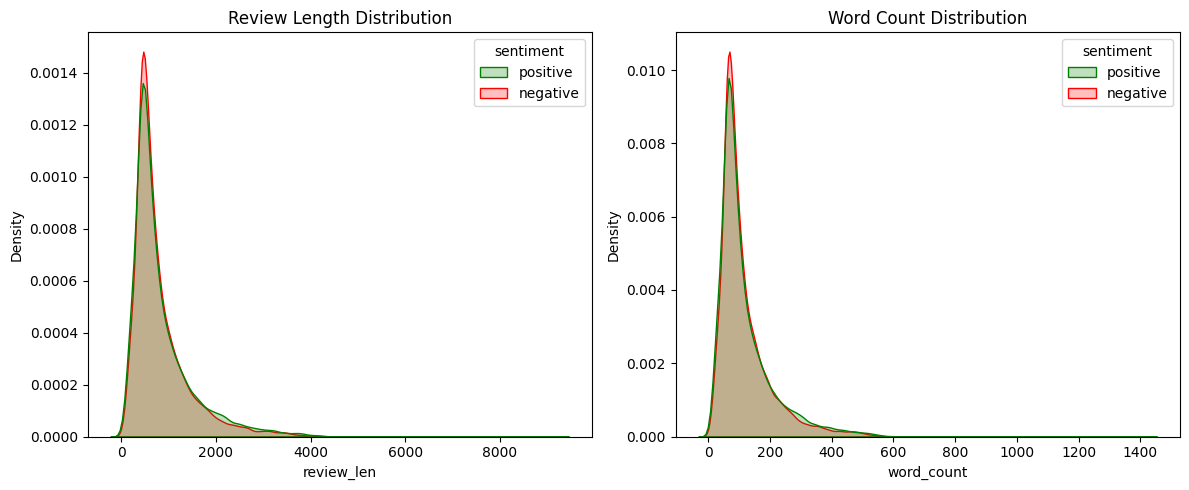

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot — Review Length
sns.kdeplot(
    data=df,
    x='review_len',
    hue='sentiment',
    fill=True,
    common_norm=False,
    palette={'positive': 'green', 'negative': 'red'},
    ax=axes[0]
)
axes[0].set_title('Review Length Distribution')

# Right plot — Word Count
sns.kdeplot(
    data=df,
    x='word_count',
    hue='sentiment',
    fill=True,
    common_norm=False,
    palette={'positive': 'green', 'negative': 'red'},
    ax=axes[1]
)
axes[1].set_title('Word Count Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# unigrams -> tokenize  # -> takes bigram and do investigation on positive and negative and do analysis
# from nltk import ngrams
# pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

In [ ]:
from nltk import ngrams
from itertools import chain

# Flatten all tokens at once
all_tokens = list(chain.from_iterable(df['tokenized_review']))

# Create n-grams
bigrams = list(ngrams(all_tokens, 2))

# Count efficiently
result = pd.Series(bigrams).value_counts()
print(result.head(10))


(ever, seen)          2524
(special, effects)    2122
(even, though)        1850
(one, best)           1817
(looks, like)         1612
(much, better)        1408
(see, movie)          1406
(waste, time)         1397
(let, us)             1312
(first, time)         1309
Name: count, dtype: int64


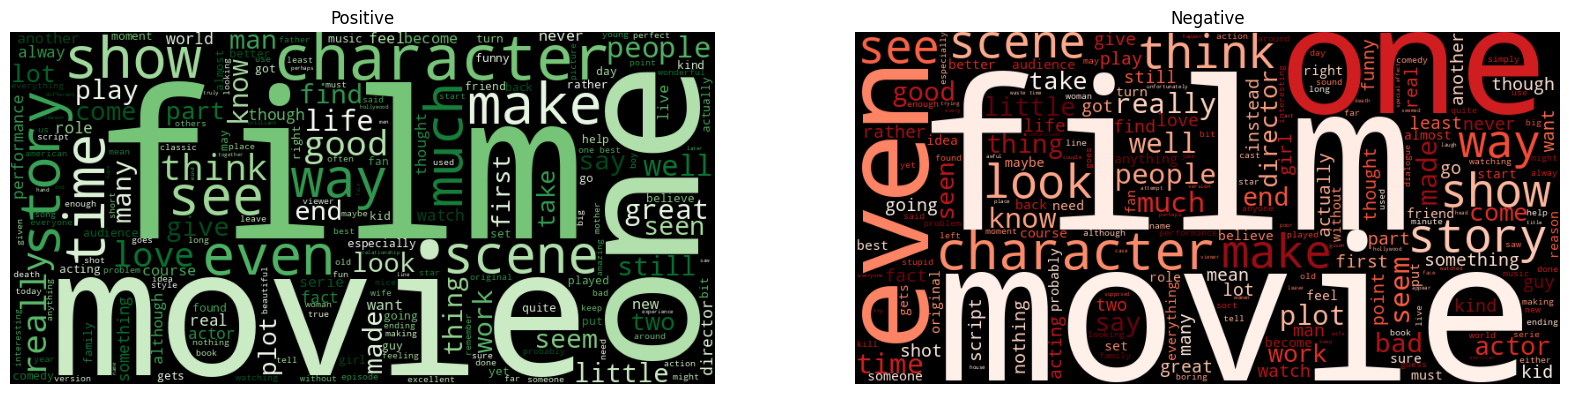

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate reviews
pos = " ".join(df[df['sentiment'] == 'positive']['review'])
neg = " ".join(df[df['sentiment'] == 'negative']['review'])

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Positive
wc_pos = WordCloud(width=800, height=400, colormap='Greens').generate(pos)
ax1.imshow(wc_pos)
ax1.set_title('Positive')
ax1.axis('off')

# Negative
wc_neg = WordCloud(width=800, height=400, colormap='Reds').generate(neg)
ax2.imshow(wc_neg)
ax2.set_title('Negative')
ax2.axis('off')

plt.show()


In [ ]:
# vectorization -> text to number

# bag of words ->

'''
- cretes list of all unique words
- count the frequency
- calculates important words based on frequency
- check all review and checks if important words exists or not
- convert into vector representation
 '''

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(max_features=5000,ngram_range=(2,2))  # we can change it to bigrams (2/2)
# (3,3) trigrams (1,3) uni+bi+tri
bow = cv.fit_transform(df['review'])

# Works with all sklearn versions
try:
    features = cv.get_feature_names_out()
except AttributeError:
    features = cv.get_feature_names()

bow_df = pd.DataFrame(bow.toarray(), columns=features)


In [ ]:
bow_df # <-- this date we sent it to machine learning model

,10 10,10 lines,10 minutes,10 stars,10 times,10 year,10 years,100 minutes,100 years,12 year,...,young man,young men,young people,young son,young woman,young women,younger brother,younger sister,zombie movie,zombie movies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA

In [ ]:
# High dimension to low dimension
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bow_df.values)



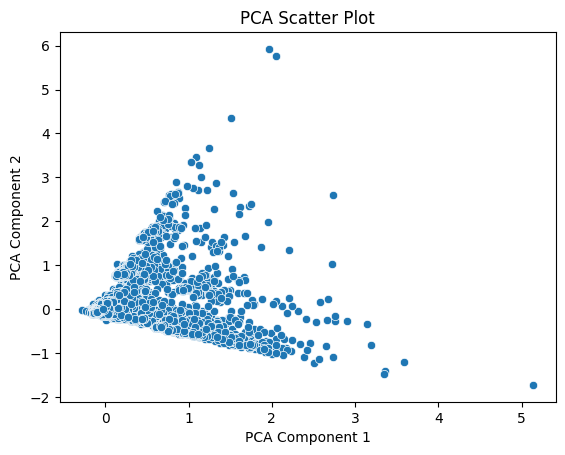

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.show()


## POS tagging